In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

# **Actual Image**

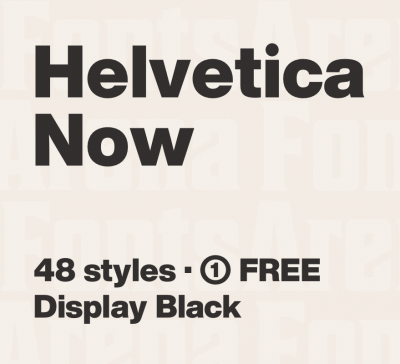

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

# **Gray Scale Image**

In [0]:
edges = cv2.Canny(image,100,200)

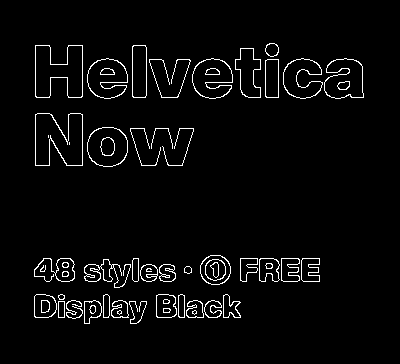

In [5]:
cv2_imshow(edges)

# **Vertical Edge Detector**

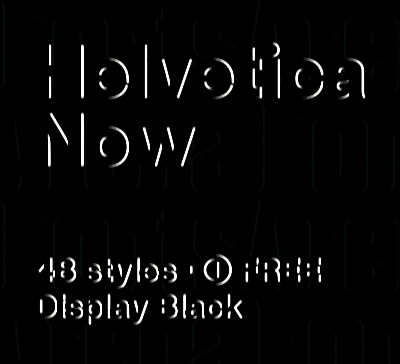

In [8]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# **Horizontal Edge Detector**
Help to identify Edges in the horizontal direction.  If we plot the kernel values in the X-axis it will a flatten line.


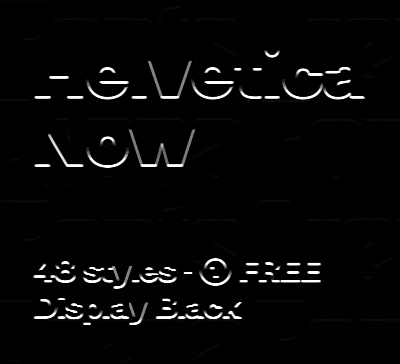

In [13]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# **45 Degree Edge Detector**

Helps to distinguish the above and below region of an image in 45 degree angle

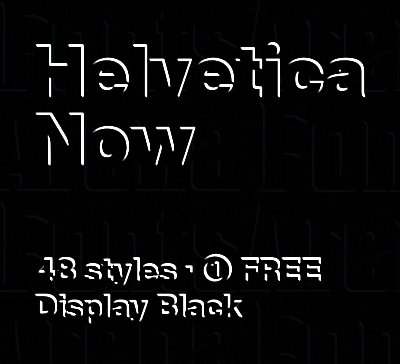

In [18]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,1,2],[-1,0,1],[-2,-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# **Blur Kernel**
Image blur is a useful technique to remove the noise and high frequency content.  Here it is achieved in three different ways

## 1) Average Blur (with manual kernel values)
In 3X3 kernel values assigned as '1' and took the average of it, which results blured image


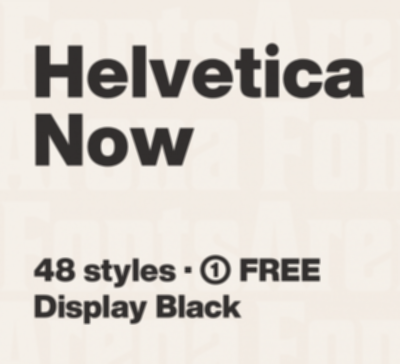

In [40]:
#kernel = np.ones((3,3),np.float32)/25
kernel = (1/9)*(np.float32([[1,1,1],[1,1,1],[1,1,1]]))

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

## **2) Average Blur(API available in OpenCV)**
It takes the average of given kernel values, we don't need to calculate the average.  This can be done with the available API cv2.blur()

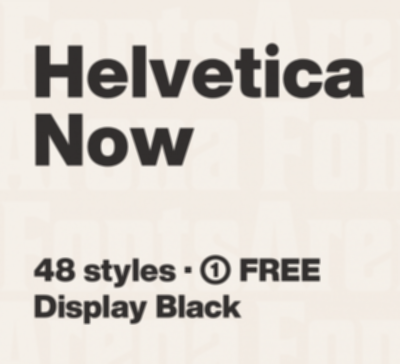

In [41]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[1,1,1],[1,1,1],[1,1,1]])

dst = cv2.blur(image, (3, 3))
cv2_imshow(dst)

## **3)Gaussian Blur(API in OpenCV)**
This is highly efficient when comparing to the other blur methods, it removes the Gaussian noise on the give imager

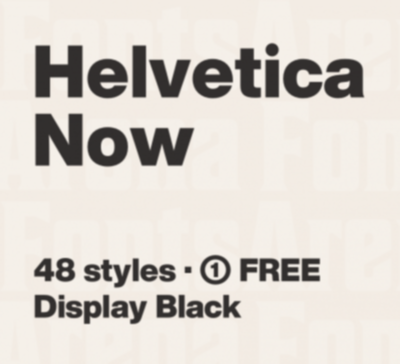

In [42]:
dst = cv2.GaussianBlur(image, (3,3), 0)
cv2_imshow(dst)

# **Sharpen Kernel**
It helps to sharp the image  which can be used to view the blured image very clearly.  If we wanted to find any particular object in the image this technique will be more useful.

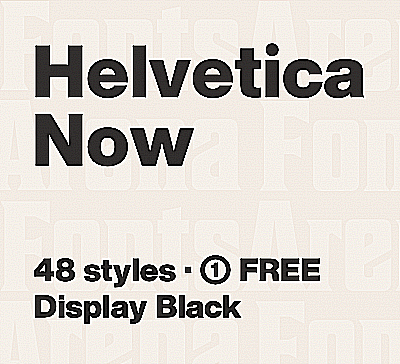

In [117]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
#kernel = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# **Identity Function**
An Identity function is nothing but a funtion which gives the same input what we have given.  In matrix terminology it is called as Identity matrix.  In 3x3 matrix a11 = 1,  a22=1 , a33=1 and all other values are zero.  But in computer vision field it has value '1' at center and rest of the values are zero

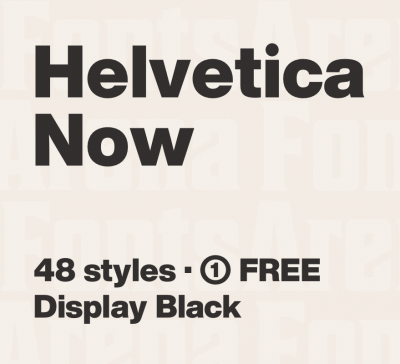

In [115]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)